# Final Project - Customer Churn Reduction
## Victoria Hall
## DSC630
## Spring 2022

### Milestone 3 - Initial Cleansing and EDA

In [38]:
#Loading libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#### Step 1 Exploring the Elements of the Initial Data Frame

In [3]:
#Reading in data
churn_df = pd.read_csv('Churn_Modelling.csv')

In [4]:
churn_df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
print("Rows:",churn_df.shape[0])
print("Columns:", churn_df.shape[1])

Rows: 10000
Columns: 14


In [10]:
#Checking data types
churn_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
#Checking for missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
#Looking at unique values
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [14]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Step 2 - Removing unnecessary information
After reviewing the initial dataframe, the data appears to already be relatively clean for modeling. There are 10,000 rows of data with 14 columns. There are no missing values and the object types of the columns appear to match the data. For the purpose of modeling, the first three columns in the frame aren't necessary. These are RowNumber, CustomerID, and Surname. I am going to drop these columns. Other than dropping unnecessary information to save on processing time for the model, the additional benefit is that by removing these identification features, we can protect the anonymity of the customers in the model building process. 

There are a few additional features that will need transfomed before modeling, including geography and gender which will need to be converted to dummy features. However, before executing those changes, I am going to perform some additional EDA, leaving the data in its current for interpretibility. 

In [15]:
#dropping columns
churn_df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [18]:
churn_df.shape

(10000, 11)

In [40]:
churn_df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

#### Step 3 EDA and Visualization

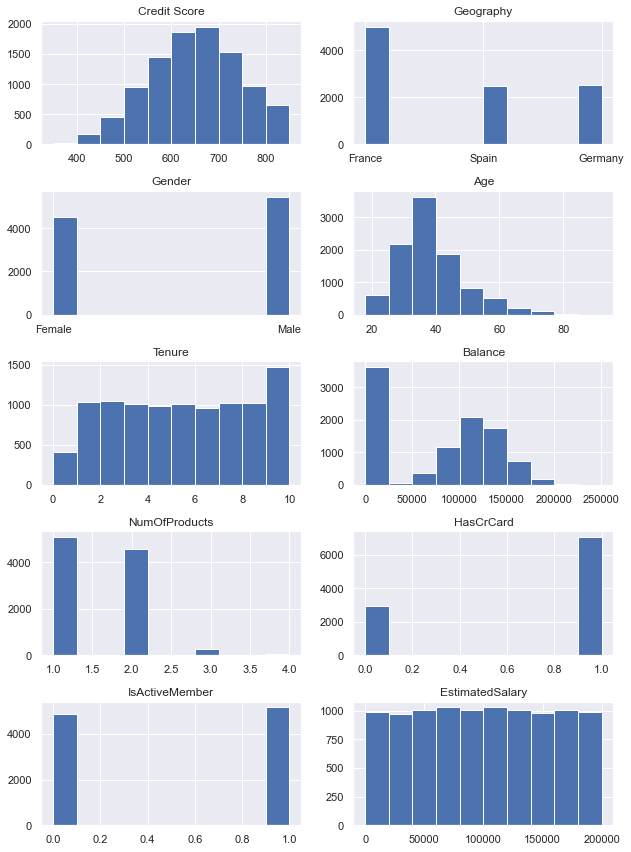

In [46]:
#Looking at distributions of features

plt.subplot(5,2,1)
plt.hist(churn_df.CreditScore)
plt.title("Credit Score")

plt.subplot(5,2,2)
plt.hist(churn_df.Geography)
plt.title("Geography")

plt.subplot(5,2,3)
plt.hist(churn_df.Gender)
plt.title("Gender")

plt.subplot(5,2,4)
plt.hist(churn_df.Age)
plt.title("Age")

plt.subplot(5,2,5)
plt.hist(churn_df.Tenure)
plt.title("Tenure")

plt.subplot(5,2,6)
plt.hist(churn_df.Balance)
plt.title("Balance")

plt.subplot(5,2,7)
plt.hist(churn_df.NumOfProducts)
plt.title("NumOfProducts")

plt.subplot(5,2,8)
plt.hist(churn_df.HasCrCard)
plt.title("HasCrCard")

plt.subplot(5,2,9)
plt.hist(churn_df.IsActiveMember)
plt.title("IsActiveMember")

plt.subplot(5,2,10)
plt.hist(churn_df.EstimatedSalary)
plt.title("EstimatedSalary")


plt.tight_layout(rect=[0, 0, 1.5, 3])
plt.show()

The above histograms are for the features in the data set. Starting with credit score, we see a relatively normal distribution, however it does appear to be right skewed. Our geography classes appear unevenly distributed with French cases doubling Spanish and German cases. Gender appears slightly unbalanced with more males but isn't as extreme. Age is left skewed with most individuals being between 30 and 60. Tenure appears to be pretty evenly distributed except at the tails with low amounts at 0-1 and high amounts between 9 and 19. Balance appears normal except for a large amount of cases below 50,000. We also see that most clients ahve 1-2 products, with more having credit cards and a pretty even split between active and nonactive genders. Finally, salary seems evenly balance bwtween 0 and 200,000.

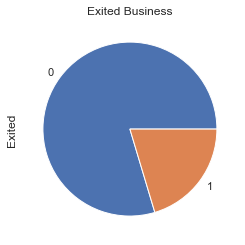

In [53]:
#Distribution of target - Exited
churn_df['Exited'].value_counts().plot(kind='pie')
plt.title("Exited Business")
plt.show()



The target class is unbalanced which is common with churn problems. 

In [54]:
churn_df.Exited.describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

About 20% of cases are customer that churned. 